## Bank Marketing Data Analysis
Portuguese bank

### About 

- Overview of the project focusing on direct marketing campaigns for a Portuguese banking institution. 
- Explanation of the problem statement: predicting subscription to a bank term deposit based on phone calls. 
- Importance of accurate prediction for optimizing marketing efforts and resource allocation.

### Business case 

The Portuguese bank is facing a decline in revenue and wants to take corrective actions. They've discovered that their clients are not depositing money as frequently as before. Term deposits are crucial for banks because they allow them to hold onto deposits for a specific period, enabling investment in higher-yield financial products for profit. Moreover, term deposit clients are more likely to consider buying additional products like funds or insurance, further boosting bank revenues. Hence, the bank wants to pinpoint existing clients with a high likelihood of subscribing to term deposits and concentrate marketing efforts on them

### Project Summar
1. **Data analysis**
2. **Data Cleaning**
3. **Data Visualization**
4. **Feature Selection**
5. **ML Models**
6. **Conclusion**

### Read The Data

#### bank client data:
- age: (numeric)
- job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education: (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- balance:  the amount of money owed (or due) on an account.
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
#### related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular','telephone')
- day: day of the month
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
#### Output variable (desired target):
- y: has the client subscribed a term deposit? (binary: 'yes','no')

#### 1.  Data analysis

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Importing the necessary libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
from collections import Counter
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from collections import Counter
import sklearn
import scipy

import random
import scipy.stats as ss
%matplotlib inline
import sys

# for Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
import sklearn.metrics as me
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_sample_weight

import pickle

# To ignore unwanted warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# for styling
plt.style.use('seaborn-whitegrid')


In [2]:
%config Completer.use_jedi = False

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

np.set_printoptions(threshold=sys.maxsize)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [3]:
# Importing the csv file
data = pd.read_csv('bank-full.csv')
data

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [4]:
data.shape

(45211, 17)

In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [7]:
#  Find missing values of each feature in the data set.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
data.describe().astype(np.int64)

age  balance    day  duration  campaign  pdays  previous
count  45211    45211  45211     45211     45211  45211     45211
mean      40     1362     15       258         2     40         0
std       10     3044      8       257         3    100         2
min       18    -8019      1         0         1     -1         0
25%       33       72      8       103         1     -1         0
50%       39      448     16       180         2     -1         0
75%       48     1428     21       319         3     -1         0
max       95   102127     31      4918        63    871       275

#### 2.  Data Cleaning

There are values like “unknown”, “others”, which are helpless just like missing values. Thus, these ambiguous values are removed from the dataset.

In [9]:
# Step 1: Delete the rows which column 'poutcome' contains 'other'
condition = data.poutcome == 'other'
data1 = data.drop(data[condition].index, axis = 0, inplace = False)

In [10]:
# Step 2: Replace 'unknown' in job and education with 'other'
data1[['job','education']] = data1[['job','education']].replace(['unknown'],'other')

In [11]:
data1

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married      other      no     1506     yes   no   
4       33         other    single      other      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45205   25    technician    single  secondary      no      505      no  yes   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45205   cellular   17   nov       386         2     -1         0  unknown  yes  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  

[43371 rows x 17 columns]

#### 3.  Data Vizualization and EDA

In [14]:
# CATEGORIGAL VALUES
cat= data1.select_dtypes(include= object)
cat_columns = cat.columns

In [15]:
cat_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [17]:
for feature in cat_columns:
    print('The feature is {} and number of categories are {}'.format(feature,len(data1[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 3
The feature is y and number of categories are 2


- Feature job and month has the highest number of categorical values

In [18]:
cat_features=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y']

In [19]:
# NUMERICAL VALUES

numeric = data1.select_dtypes(include=np.number)
numeric_columns= numeric.columns
numeric_columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [20]:
# Removing outliners
def Outdet(col):
    Q1 = data1[col].quantile(0.25)
    Q3 = data1[col].quantile(0.75)
    IQR = Q3 - Q1
    LR = Q1 - (IQR * 1.5)
    UR = Q3 + (IQR * 1.5)
    return LR, UR

LR, UR = Outdet(numeric_columns)
print("The Lower Quartile outliers are:\n", LR)
print("The Upper Quartile outliers are:\n", UR)

The Lower Quartile outliers are:
 age           10.5
balance    -1950.5
day          -11.5
duration    -219.5
campaign      -2.0
pdays         -1.0
previous       0.0
dtype: float64
The Upper Quartile outliers are:
 age           70.5
balance     3437.5
day           40.5
duration     640.5
campaign       6.0
pdays         -1.0
previous       0.0
dtype: float64


In [22]:
# IQR
Q1 = np.percentile(data1['age'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data1['age'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data1.shape)
 
# Upper bound
upper = np.where(data1['age'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data1['age'] <= (Q1-1.5*IQR))
 
''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (43371, 17)
Outliers are: (array([28844, 28936, 28938, 28992, 29479, 29797, 29833, 30404, 30535,
       30536, 30539, 30541, 30553, 30561, 30572, 30582, 30584, 30591,
       30599, 30608, 30613, 30626, 30630, 30632, 30664, 30670, 30713,
       30734, 30740, 30763, 30818, 30842, 30860, 30869, 30871, 30890,
       30922, 30994, 31035, 31109, 31176, 31264, 31443, 31466, 31495,
       31499, 31505, 31520, 31536, 31590, 31630, 31738, 31854, 32068,
       32077, 32171, 32361, 32672, 32719, 32756, 32973, 32980, 32984,
       32993, 33002, 33024, 33025, 33038, 33047, 33049, 33052, 33074,
       33081, 33082, 33086, 33098, 33117, 33130, 33381, 39009, 39013,
       39014, 39020, 39026, 39028, 39034, 39046, 39047, 39056, 39113,
       39123, 39155, 39164, 39166, 39176, 39199, 39207, 39208, 39221,
       39223, 39232, 39257, 39279, 39289, 39291, 39306, 39308, 39320,
       39331, 39334, 39342, 39344, 39355, 39361, 39387, 39394, 39413,
       39416, 39419, 39442, 39461, 39462, 39467, 39

In [23]:
# IQR
Q1 = np.percentile(data1['balance'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data1['balance'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data1.shape)
 
# Upper bound
upper = np.where(data1['balance'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data1['balance'] <= (Q1-1.5*IQR))
 
''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (43371, 17)
Outliers are: (array([   34,    65,    69,    70,   186,   187,   205,   334,   382,
         391,   428,   446,   493,   510,   533,   565,   569,   592,
         630,   756,   757,   866,   908,   916,   920,  1120,  1193,
        1213,  1229,  1236,  1241,  1272,  1283,  1307,  1438,  1470,
        1490,  1560,  1584,  1606,  1642,  1788,  1825,  1843,  1892,
        1917,  1962,  1964,  1980,  1981,  1997,  2019,  2048,  2055,
        2065,  2074,  2089,  2108,  2144,  2154,  2185,  2265,  2278,
        2343,  2433,  2439,  2443,  2456,  2473,  2479,  2492,  2500,
        2502,  2508,  2512,  2546,  2554,  2558,  2576,  2578,  2594,
        2595,  2601,  2618,  2619,  2673,  2678,  2701,  2706,  2741,
        2752,  2759,  2767,  2773,  2775,  2778,  2791,  2792,  2795,
        2804,  2824,  2827,  2834,  2852,  2853,  2867,  2881,  2892,
        2899,  2908,  2914,  2926,  2931,  2938,  2944,  2953,  2955,
        2956,  2980,  2989,  2990,  2992,  2996,  2

In [24]:
# IQR
Q1 = np.percentile(data1['day'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data1['day'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data1.shape)
 
# Upper bound
upper = np.where(data1['day'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data1['day'] <= (Q1-1.5*IQR))
 
''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (43371, 17)
Outliers are: (array([], dtype=int64),) (array([], dtype=int64),)


In [25]:
# IQR
Q1 = np.percentile(data1['duration'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data1['duration'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data1.shape)
 
# Upper bound
upper = np.where(data1['duration'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data1['duration'] <= (Q1-1.5*IQR))
 
''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (43371, 17)
Outliers are: (array([   37,    43,    53,    59,    61,    83,    86,    87,   109,
         130,   152,   168,   170,   179,   181,   182,   224,   231,
         232,   241,   249,   271,   291,   330,   347,   351,   372,
         388,   390,   394,   411,   430,   431,   446,   467,   471,
         474,   512,   569,   600,   624,   626,   663,   670,   694,
         728,   785,   814,   815,   817,   849,   853,   857,   877,
         897,   934,   956,   960,   987,   998,  1002,  1007,  1015,
        1018,  1034,  1065,  1086,  1087,  1121,  1124,  1131,  1138,
        1140,  1172,  1173,  1189,  1193,  1198,  1210,  1239,  1247,
        1273,  1283,  1298,  1316,  1323,  1346,  1355,  1372,  1391,
        1416,  1421,  1462,  1487,  1520,  1524,  1563,  1575,  1596,
        1648,  1662,  1671,  1674,  1691,  1698,  1731,  1749,  1763,
        1767,  1795,  1806,  1810,  1832,  1850,  1851,  1860,  1863,
        1885,  1894,  1899,  1900,  1917,  1952,  1

In [26]:
# IQR
Q1 = np.percentile(data1['campaign'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data1['campaign'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data1.shape)
 
# Upper bound
upper = np.where(data1['campaign'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data1['campaign'] <= (Q1-1.5*IQR))
 
''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (43371, 17)
Outliers are: (array([  706,   758,   780,   797,   843,   906,   910,  1046,  1053,
        1055,  1103,  1105,  1106,  1158,  1386,  1441,  1446,  1469,
        1483,  1495,  1502,  1547,  1551,  1579,  1626,  1760,  1905,
        1914,  1917,  1919,  1942,  2017,  2018,  2033,  2039,  2041,
        2043,  2059,  2071,  2075,  2085,  2110,  2145,  2156,  2209,
        2244,  2251,  2261,  2264,  2265,  2278,  2288,  2289,  2290,
        2292,  2295,  2298,  2302,  2305,  2310,  2319,  2321,  2385,
        2528,  2545,  2552,  2553,  2554,  2625,  2626,  2629,  2659,
        2664,  2665,  2684,  2686,  2693,  2696,  2706,  2707,  2708,
        2727,  2731,  2735,  2738,  2757,  2770,  2804,  2852,  2962,
        2967,  2972,  2983,  3021,  3035,  3041,  3044,  3057,  3079,
        3095,  3102,  3112,  3118,  3120,  3141,  3143,  3149,  3150,
        3179,  3186,  3205,  3224,  3258,  3279,  3331,  3355,  3364,
        3367,  3370,  3397,  3399,  3431,  3436,  3

In [27]:
# IQR
Q1 = np.percentile(data1['previous'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data1['previous'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data1.shape)
 
# Upper bound
upper = np.where(data1['previous'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data1['previous'] <= (Q1-1.5*IQR))
 
''' Detecting the Outliers '''
print("Outliers are:",upper,lower)

Old Shape:  (43371, 17)
Outliers are: (array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    14,    15,    16,    17,
          18,    19,    20,    21,    22,    23,    24,    25,    26,
          27,    28,    29,    30,    31,    32,    33,    34,    35,
          36,    37,    38,    39,    40,    41,    42,    43,    44,
          45,    46,    47,    48,    49,    50,    51,    52,    53,
          54,    55,    56,    57,    58,    59,    60,    61,    62,
          63,    64,    65,    66,    67,    68,    69,    70,    71,
          72,    73,    74,    75,    76,    77,    78,    79,    80,
          81,    82,    83,    84,    85,    86,    87,    88,    89,
          90,    91,    92,    93,    94,    95,    96,    97,    98,
          99,   100,   101,   102,   103,   104,   105,   106,   107,
         108,   109,   110,   111,   112,   113,   114,   115,   116,
         117,   118,   119,   120,   121,   122,   

In [28]:
num_features=['age', 'balance', 'day', 'duration',
       'campaign', 'pdays', 'previous']

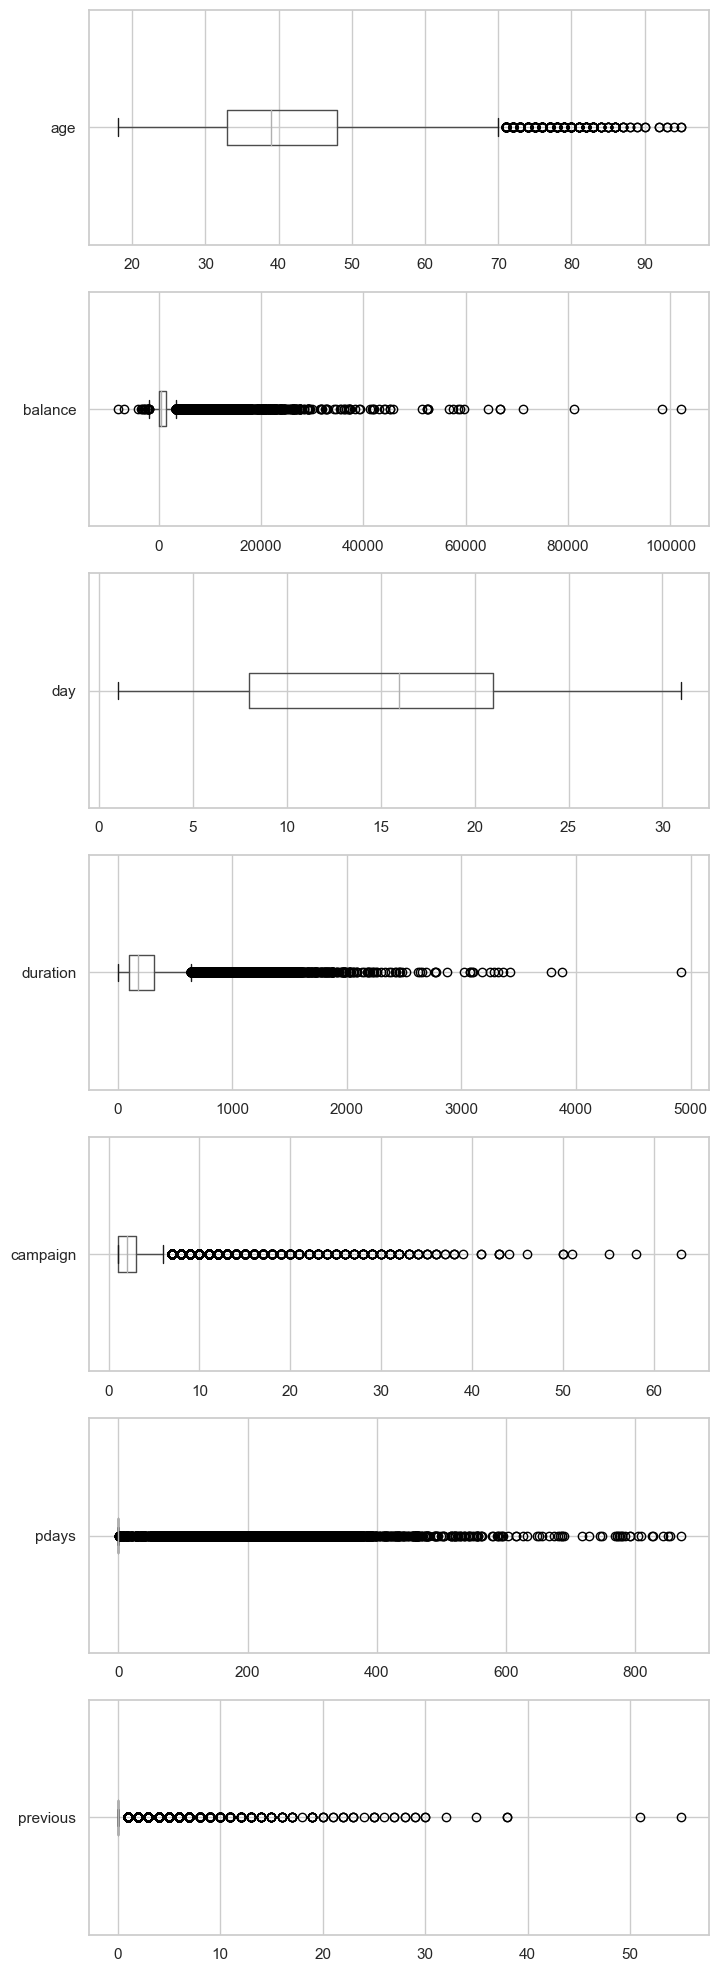

In [30]:
# Boxplot for each numerical feature

fig, axes = plt.subplots(7, 1, figsize=(8, 25))
for i, c in enumerate(num_features):
    f = data1[[c]].boxplot(ax=axes[i], vert=False) 

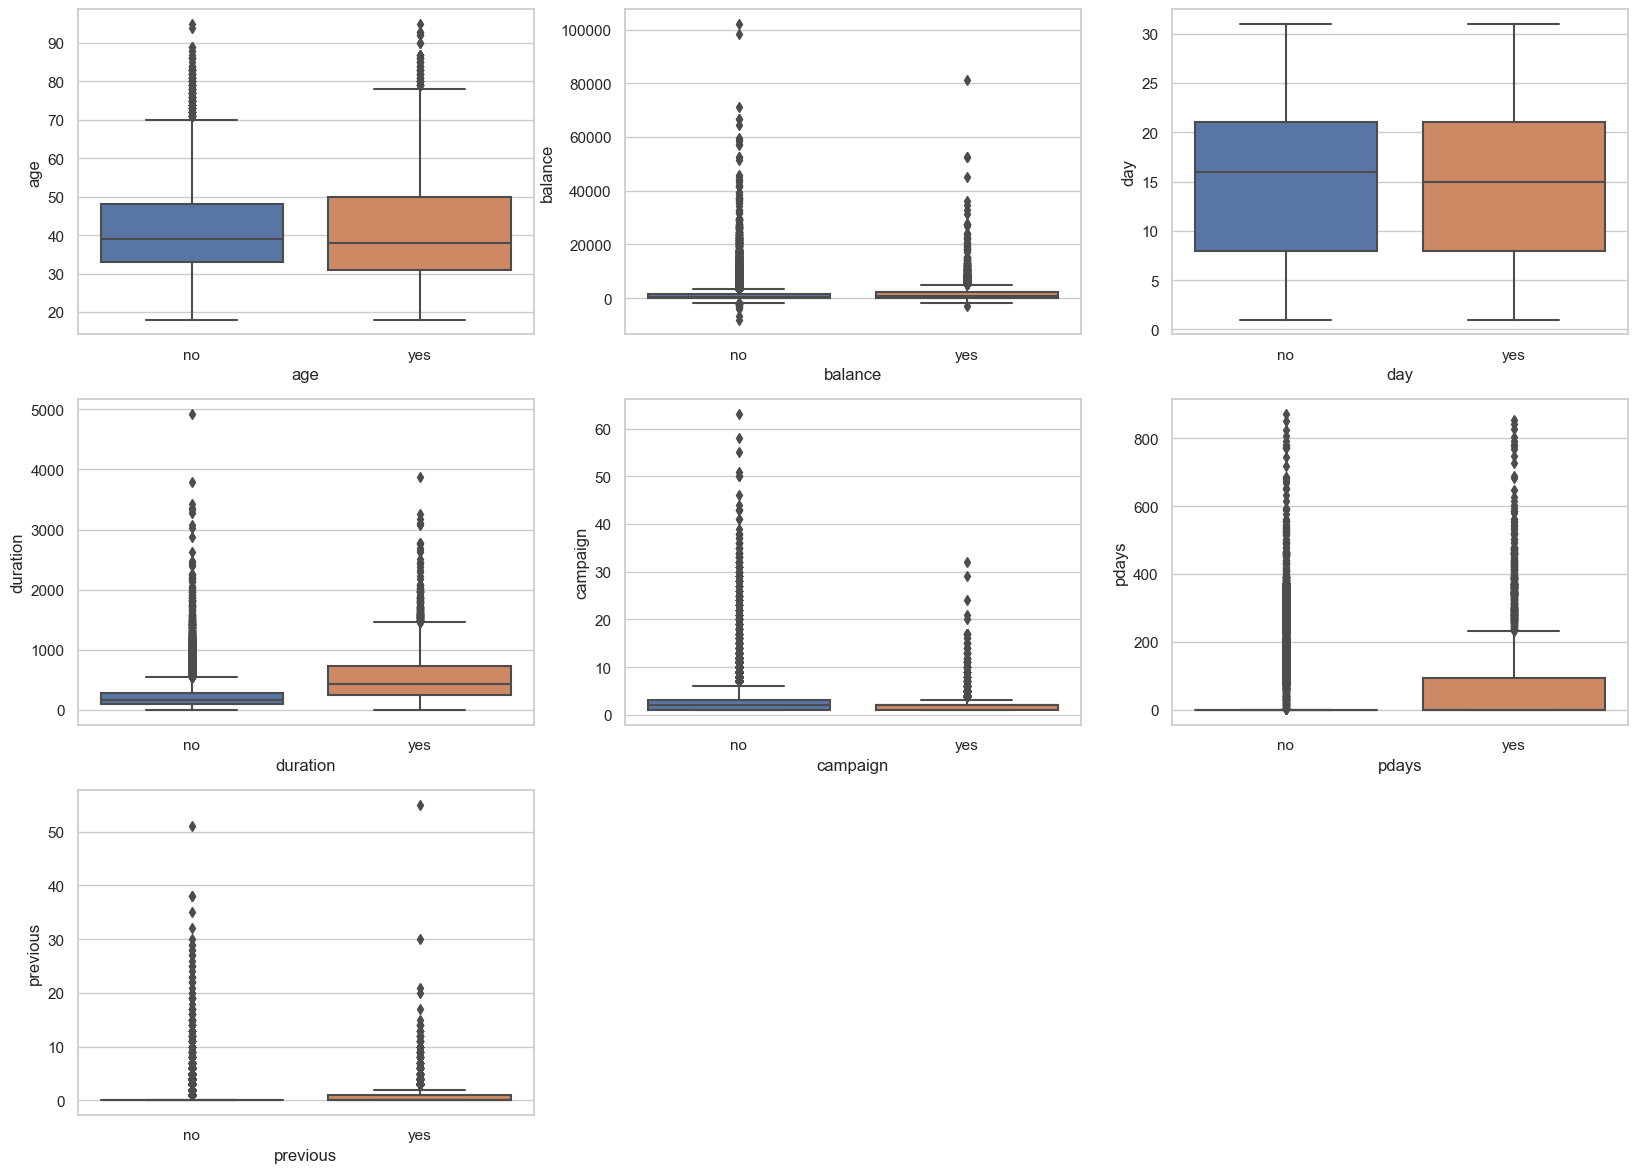

In [31]:
# boxplot to show target distribution with respect numerical features

plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in num_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= data1[feature], data=data1)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

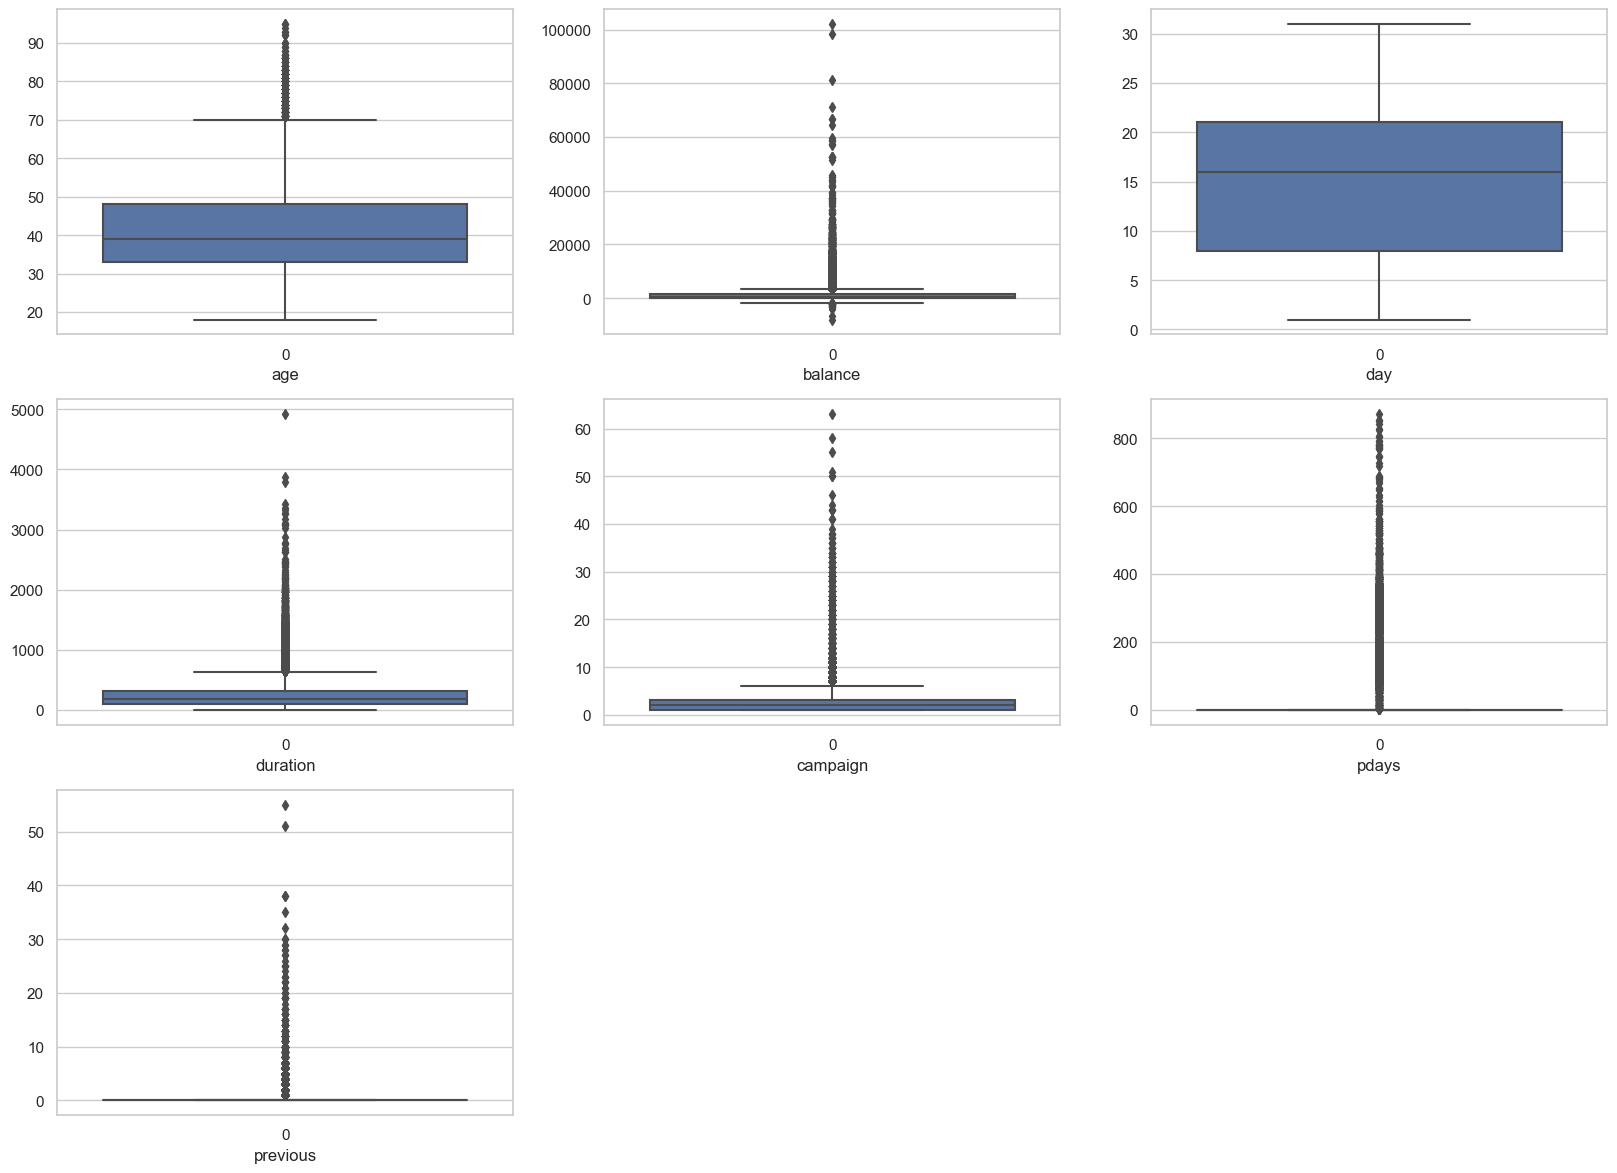

In [32]:
# boxplot on numerical features to find outliers

plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for num_features in num_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(data1[num_features])
    plt.xlabel(num_features)
    plotnumber+=1
plt.show()

In [33]:
num_features=['age', 'balance', 'day', 'duration',
       'campaign', 'pdays', 'previous']

In [34]:
#Creating 'day_of_week' column
day_of_past_months_list = []
day_of_month = [0,31,28,31,30,31,30,31,31,30,31,30]
day_of_past_month = 0
for i,days_of_last_month in enumerate(day_of_month):
    day_of_past_month += days_of_last_month
    day_of_past_months_list.append(day_of_past_month)
    
lst = [data1]

for column in lst:
     column.loc[column['month'] == 'jan',  'day_of_week'] = (day_of_past_months_list[0] + column['day']) % 7
     column.loc[column['month'] == 'feb',  'day_of_week'] = (day_of_past_months_list[1] + column['day']) % 7
     column.loc[column['month'] == 'mar',  'day_of_week'] = (day_of_past_months_list[2] + column['day']) % 7
     column.loc[column['month'] == 'apr',  'day_of_week'] = (day_of_past_months_list[3] + column['day']) % 7
     column.loc[column['month'] == 'may',  'day_of_week'] = (day_of_past_months_list[4] + column['day']) % 7
     column.loc[column['month'] == 'jun',  'day_of_week'] = (day_of_past_months_list[5] + column['day']) % 7
     column.loc[column['month'] == 'jul',  'day_of_week'] = (day_of_past_months_list[6] + column['day']) % 7
     column.loc[column['month'] == 'aug',  'day_of_week'] = (day_of_past_months_list[7] + column['day']) % 7
     column.loc[column['month'] == 'sep',  'day_of_week'] = (day_of_past_months_list[8] + column['day']) % 7
     column.loc[column['month'] == 'oct',  'day_of_week'] = (day_of_past_months_list[9] + column['day']) % 7
     column.loc[column['month'] == 'nov',  'day_of_week'] = (day_of_past_months_list[10] + column['day']) % 7
     column.loc[column['month'] == 'dec',  'day_of_week'] = (day_of_past_months_list[11] + column['day']) % 7
data1['day_of_week'] = data1['day_of_week'].astype(int)

In [35]:
#'pdays' into bucket
def pdays_to_bucket(pdays):
    if pdays == -1:
        return 'Not contacted'
    elif pdays < 8:
        return  '1 week or less'
    elif pdays > 7 and pdays < 32:
        return  '1 week to 1 month'
    elif pdays > 31 and pdays < 366:
        return  '1 month to 1 year'
    else:
        return  '> 1 year'
data1['bucket_pdays'] = data1['pdays'].apply(pdays_to_bucket)

In [36]:
bank_df = data1.drop('pdays', axis=1)

In [37]:
#In target value, 'yes' to 'subscribed_yes', 'no' to 'subscribed_no' 
def subscribed_yes_no(y):
    if y == 'yes':
        return 'subscribed_yes'
    else:
        return 'subscribed_no'
bank_df['y'] = bank_df['y'].apply(subscribed_yes_no)

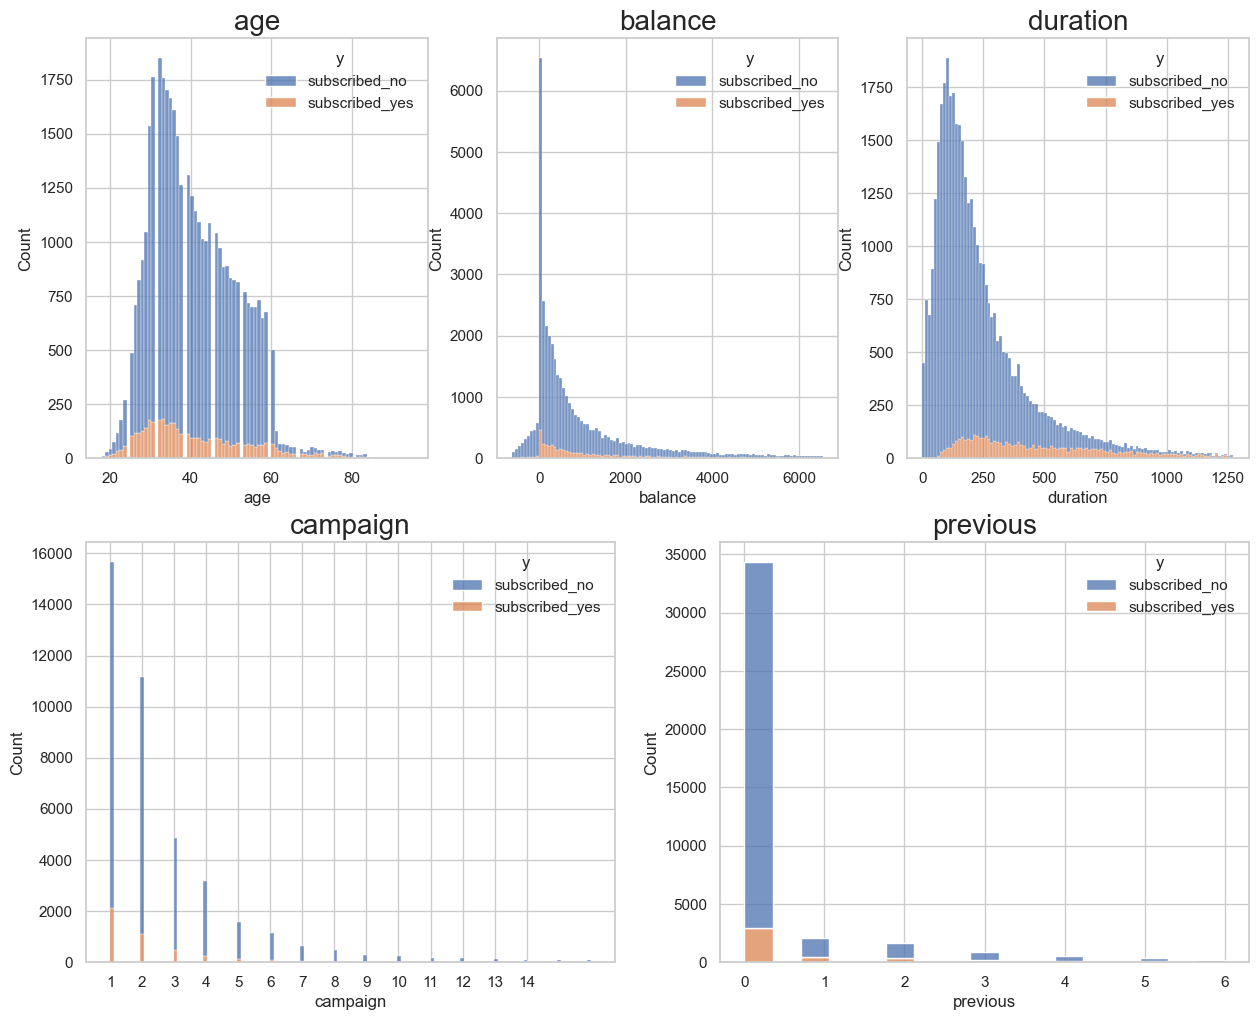

In [38]:
bank_hist_df = bank_df.copy()
q_balance = bank_hist_df.balance.quantile(0.96)
q_balance_low = bank_hist_df.balance.quantile(0.01)
q_duration = bank_hist_df.duration.quantile(0.99)
q_campaign = bank_hist_df.campaign.quantile(0.99)
q_previous = bank_hist_df.previous.quantile(0.99)

bank_hist_df_outlayer_removed = bank_hist_df[(bank_hist_df['balance']<q_balance)&(bank_hist_df['balance']>q_balance_low)&(bank_hist_df['duration']<q_duration)&\
                                                  (bank_hist_df['campaign']<q_campaign)&(bank_hist_df['previous']<q_previous)]
continuous_columns = ['age','balance','duration','campaign','previous']
fig = plt.figure(figsize=(15,12))
for i,column in enumerate(continuous_columns):
    if column == 'age' or column == 'balance' or column == 'duration':
        #bins = 90
        bins = 40
        ax = fig.add_subplot(2, 3, i + 1)
        align = 'mid'
        ran=None
    elif column == 'campaign':
        bins = 14
        ax = fig.add_subplot(2, 2, i )
        align = 'left'
        ran=(1,15)
        plt.xticks(np.arange(1, 15, step=1))
    else:
        bins = 7
        ax = fig.add_subplot(2, 2, i )
        align = 'left'
        ran=(0,7)
        plt.xticks(np.arange(0,7, step=1))
    ax.set_title(column,fontsize =20) 
    sns.histplot(x=column, hue="y", data=bank_hist_df_outlayer_removed, multiple="stack", ax=ax)
plt.show()

The distribution of age:
- In its telemarketing campaigns, clients called by the bank have a wide range of age from 18 to 95 years. However, a majority of customers called are in the ages of 30s and 40s (33 to 48 years ages fall within the 25th to 75th percentiles). The distribution of customer age is fairly normal with a small standard deviation.
- The clients over 60's has high subscription yes rate. They should be worth pursuing. Another graph will also show the subscription yes rate for each group.

The distribution of duration:
- As the time that the clients talk gets higher, the 'subscription no' rate gets lower

The distribution of duration:
- As the time that clients talked gets longer, the subscription no rate gets lower

The distribution of previous:
- This parameter mostly has value of 0, so it's distribution is very uneven. All the values except 0 can be grouped together

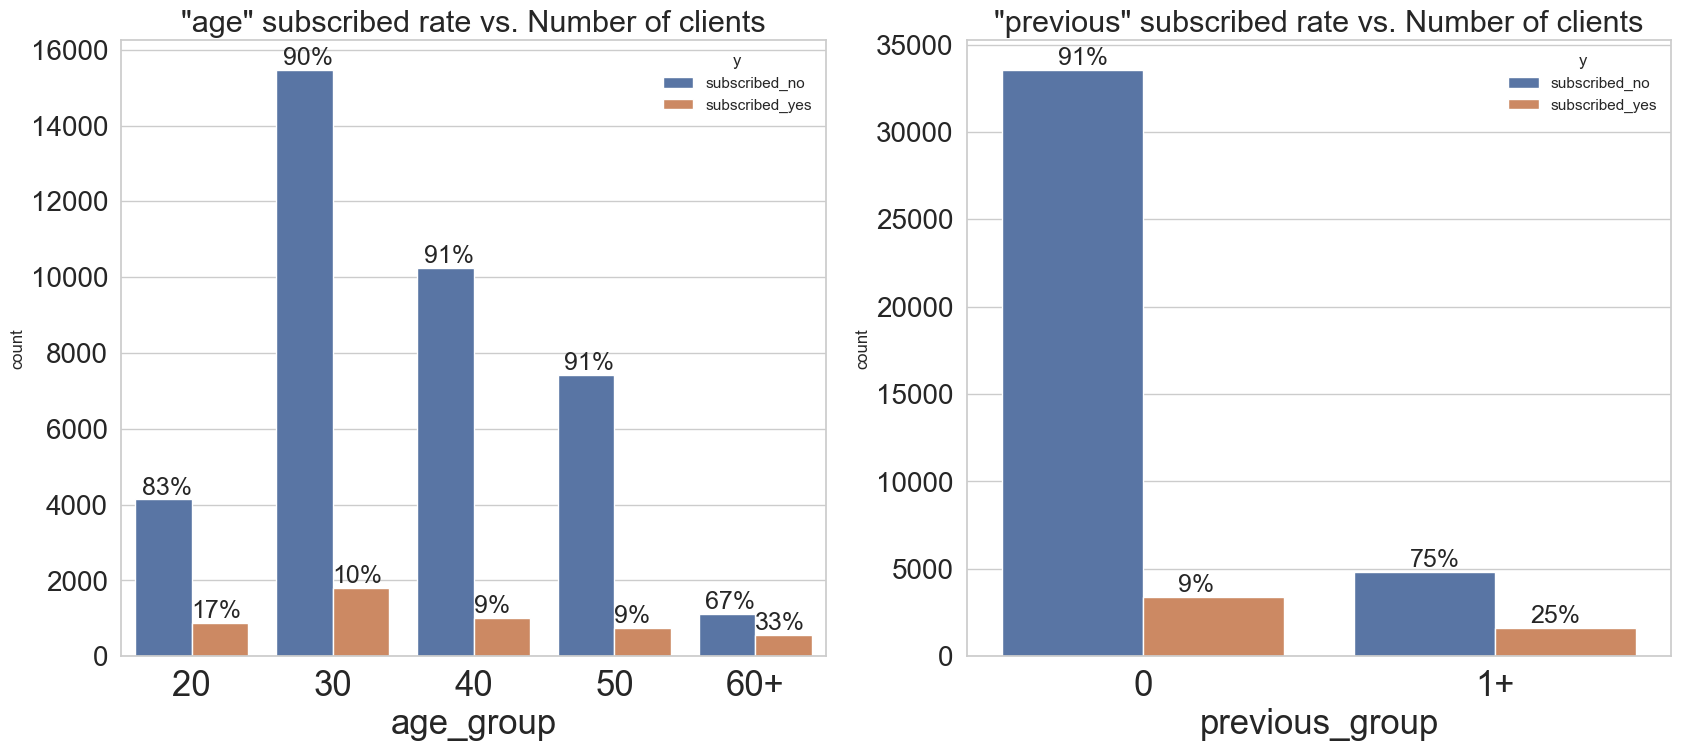

In [39]:
#age group
lst = [bank_df]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = '20'
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = '30'
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = '40'
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = '50'
    column.loc[column["age"] >= 60, 'age_group'] = '60+'

age_group_y_pct = pd.crosstab(bank_df['y'],bank_df['age_group']).apply(lambda x: x/x.sum() * 100)
age_group_y_pct = age_group_y_pct.transpose() 

age_group_num_or_sum_df = pd.DataFrame()
age_group_num_or_sum_df = pd.crosstab(bank_df['age_group'], bank_df['y']).reindex(index=['20', '30', '40', '50', '60+'])

#Previous group
lst_2 = [bank_df]
for column in lst_2:
    column.loc[column["previous"] == 0,  'previous_group'] = "0"
    column.loc[column["previous"] >= 1, 'previous_group'] = "1+"
    
previous_group_y_pct = pd.crosstab(bank_df['y'],bank_df['previous_group']).apply(lambda x: x/x.sum() * 100)
previous_group_y_pct = previous_group_y_pct.transpose() 

previous_group_num_or_sum_df = pd.DataFrame()
previous_group_num_or_sum_df = pd.crosstab(bank_df['previous_group'], bank_df['y']).reindex(index=["0", "1+"])

#graphs
order_list = ['20', '30', '40', '50', '60+']
fig = plt.figure(figsize=(20,8))
ax_1 = fig.add_subplot(1, 2, 1)
ax_1.set_xlabel('age Group',fontsize=25, y=0.5)
ax_1.tick_params(axis='x', labelsize=25)
ax_1.tick_params(axis='y', labelsize=20)
ax_1.set_title('"age" subscribed rate vs. Number of clients',fontsize =22)
sns.countplot(x="age_group", hue="y", data=bank_df, order=order_list, ax=ax_1)
for i,age_group_group in enumerate(age_group_num_or_sum_df.index):
    plt.text(i, age_group_num_or_sum_df.loc[age_group_group, 'subscribed_yes'], "{}%".format(round(age_group_y_pct.loc[age_group_group, 'subscribed_yes'])),  ha='left', va='bottom', size=18)
    plt.text(i, age_group_num_or_sum_df.loc[age_group_group, 'subscribed_no'], "{}%".format(round(age_group_y_pct.loc[age_group_group, 'subscribed_no'])),  ha='right', va='bottom', size=18)

ax_2 = fig.add_subplot(1, 2, 2)
ax_2.set_xlabel('previous Group',fontsize=25, y=0.5)
ax_2.tick_params(axis='x', labelsize=25)
ax_2.tick_params(axis='y', labelsize=20)
ax_2.set_title('"previous" subscribed rate vs. Number of clients',fontsize =22)
sns.countplot(x="previous_group", hue="y", data=bank_df, ax=ax_2)
for i,previous_group_group in  enumerate(previous_group_num_or_sum_df.index):
    plt.text(i + 0.1, previous_group_num_or_sum_df.loc[previous_group_group, 'subscribed_yes'], "{}%".format(round(previous_group_y_pct.loc[previous_group_group, 'subscribed_yes'])),  ha='left', va='bottom', size=18)
    plt.text(i - 0.1, previous_group_num_or_sum_df.loc[previous_group_group, 'subscribed_no'], "{}%".format(round(previous_group_y_pct.loc[previous_group_group, 'subscribed_no'])),  ha='right', va='bottom', size=18)

plt.show()

"age" subscribed rate vs. Number of clients:
- There are less number of clients over 60s. However, it has a higher subscription rate than the other age groups. 
- The 20s age group has higher subscribed yes than the 60s. But the rate compared to subscribed yes of 18% is much lower than the 34% subscribed yes of 60s age group.

"previous" subscribed rate vs. Number of clients:
- If clients were contacted more that 1 time, subscription yes rate gets higher.

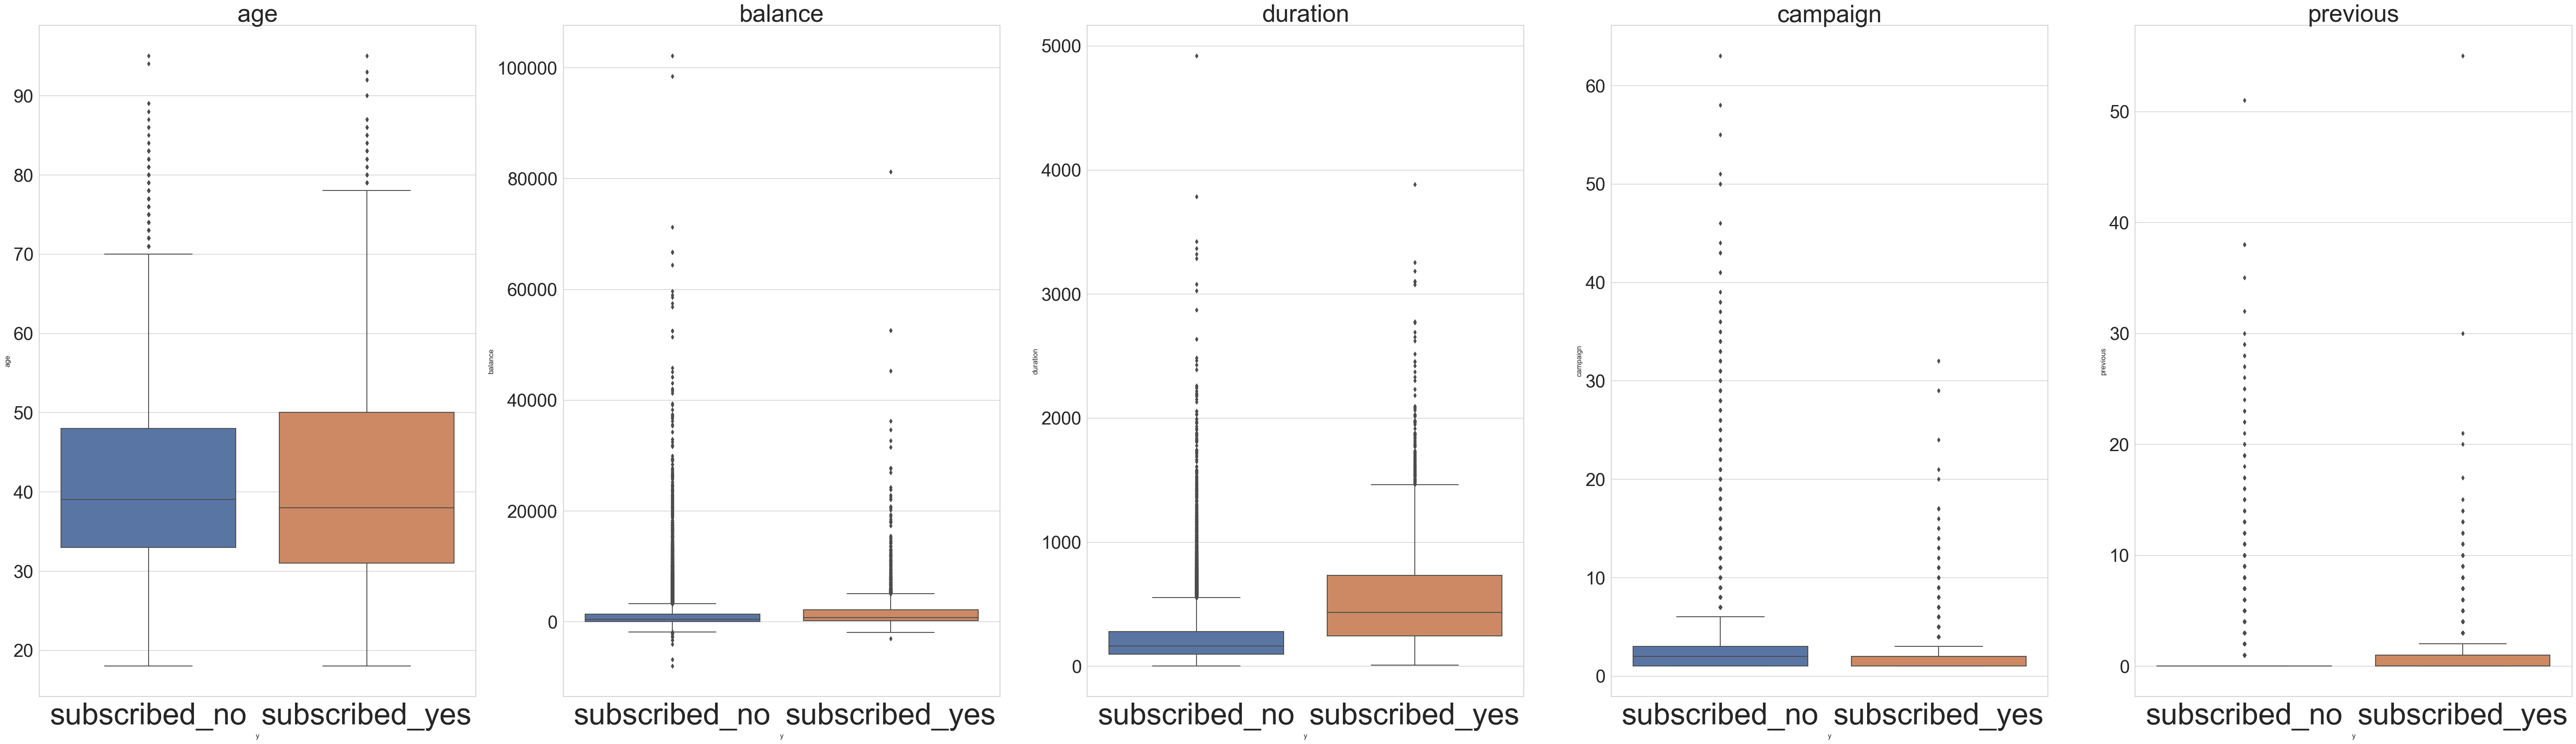

In [40]:
fig = plt.figure(figsize=(75,20))
for i,column in enumerate(continuous_columns):
    ax = fig.add_subplot(1, 5, i + 1)
    sns.boxplot(x = 'y', y = column, data = bank_df)
    ax.set_title(column,fontsize =40)
    ax.tick_params(axis='x', labelsize=50)
    ax.tick_params(axis='y', labelsize=30)

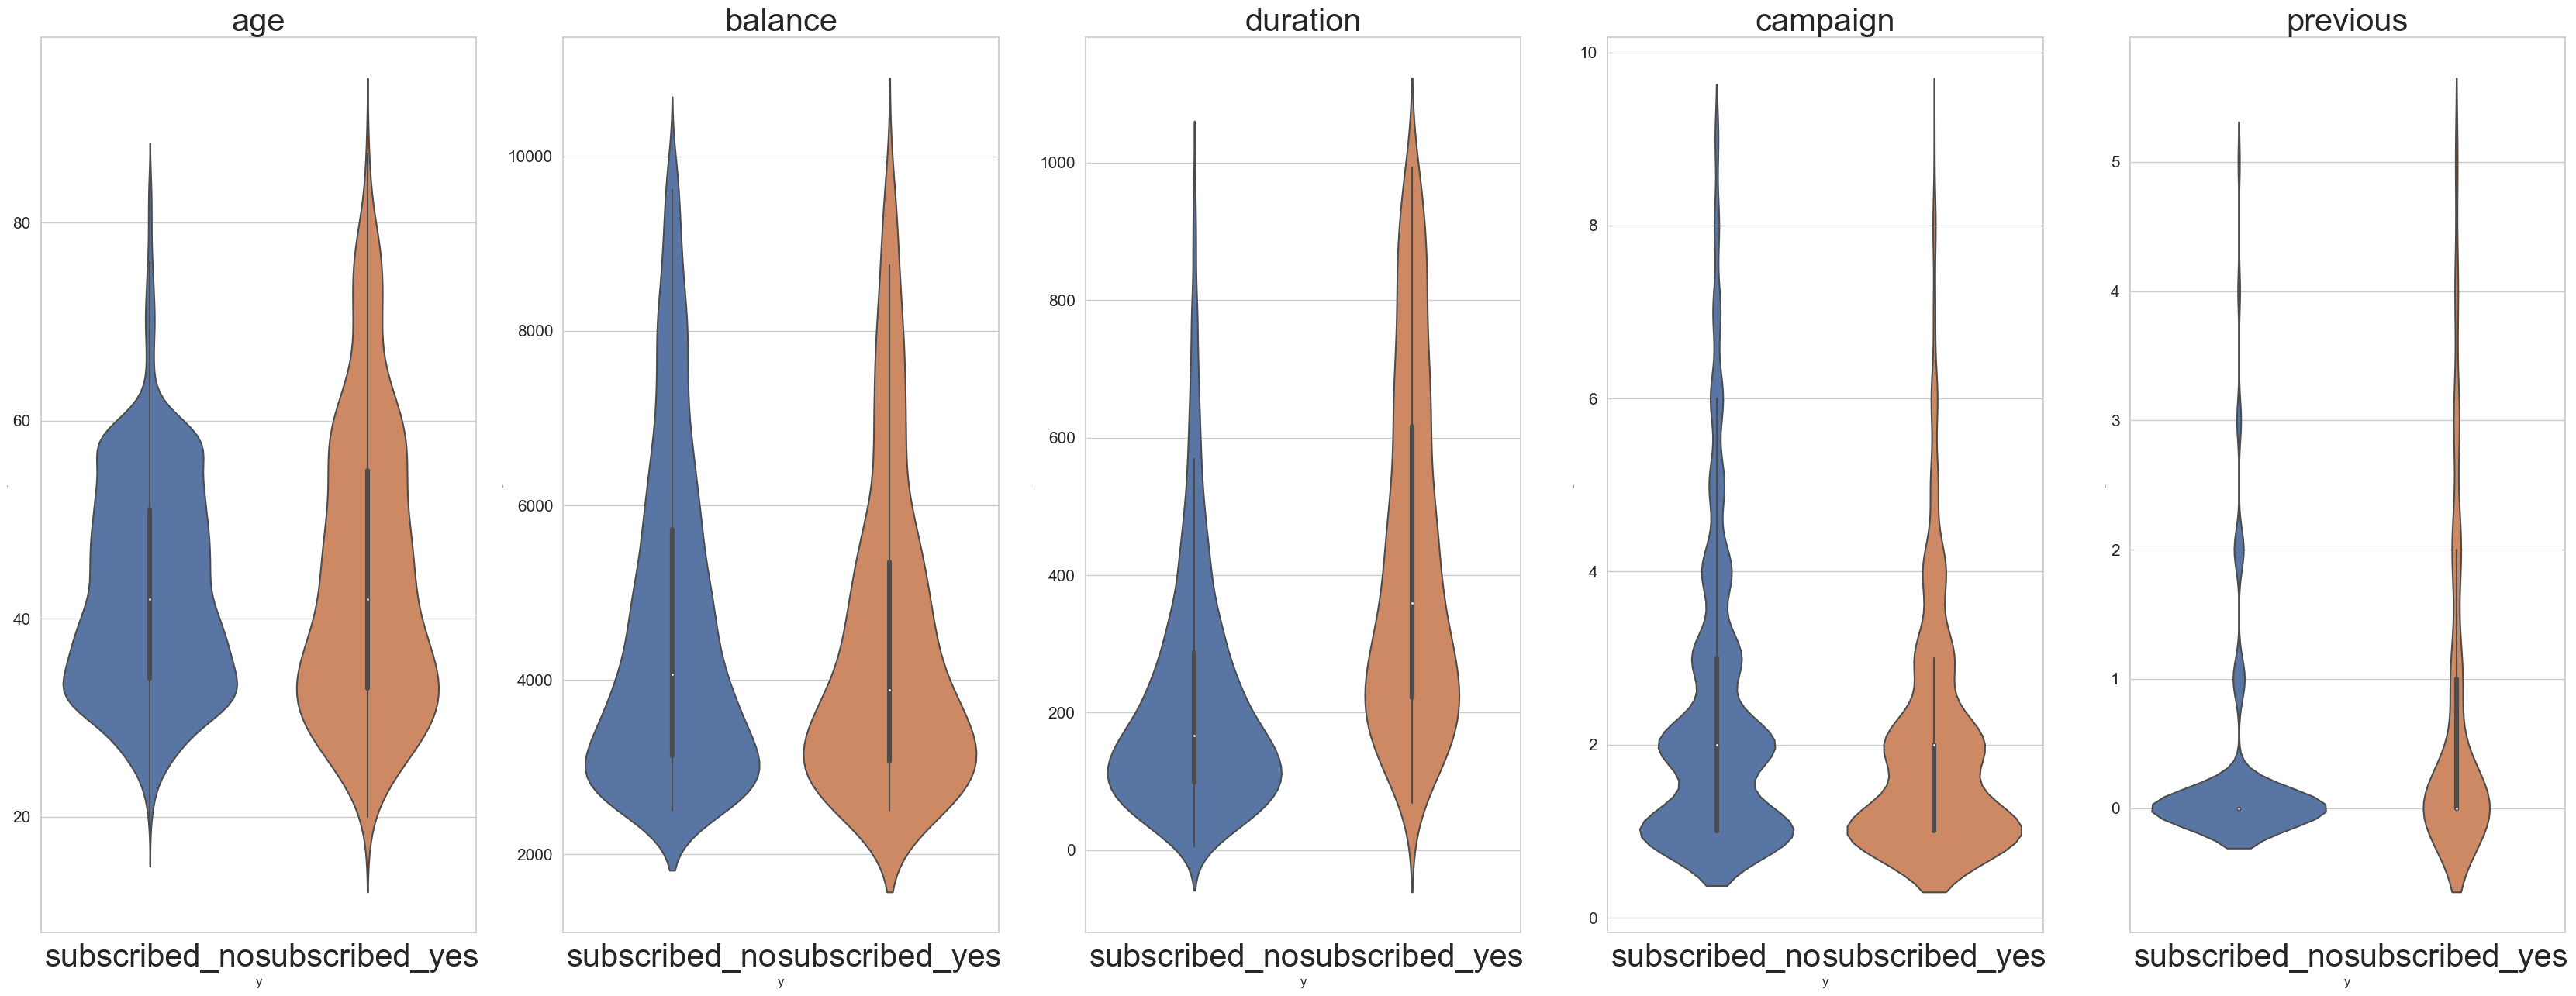

In [41]:
bank_remove_previous_outl = bank_df[(bank_df['previous'] < 6)&(bank_df['balance'] < 10000)&(bank_df['balance'] > 2500)&(bank_df['campaign'] < 10)&(bank_df['duration'] < 1000)]
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(42,15))
ax_list = [ax1, ax2, ax3, ax4, ax5]
for i,column in enumerate(continuous_columns):
 sns.violinplot(data=bank_remove_previous_outl, x='y', y=column, ax=ax_list[i])
 ax_list[i].set_title(column,fontsize =30)
 ax_list[i].set_ylabel(column,fontsize =0)
 ax_list[i].tick_params(axis='x', labelsize=30)
 ax_list[i].tick_params(axis='y', labelsize=15)

- In graph for age, the clients who are over 60 years old have high rate of 'yes' (clients who have time deposit). 
- Also clients who are younger have high rate of 'yes'

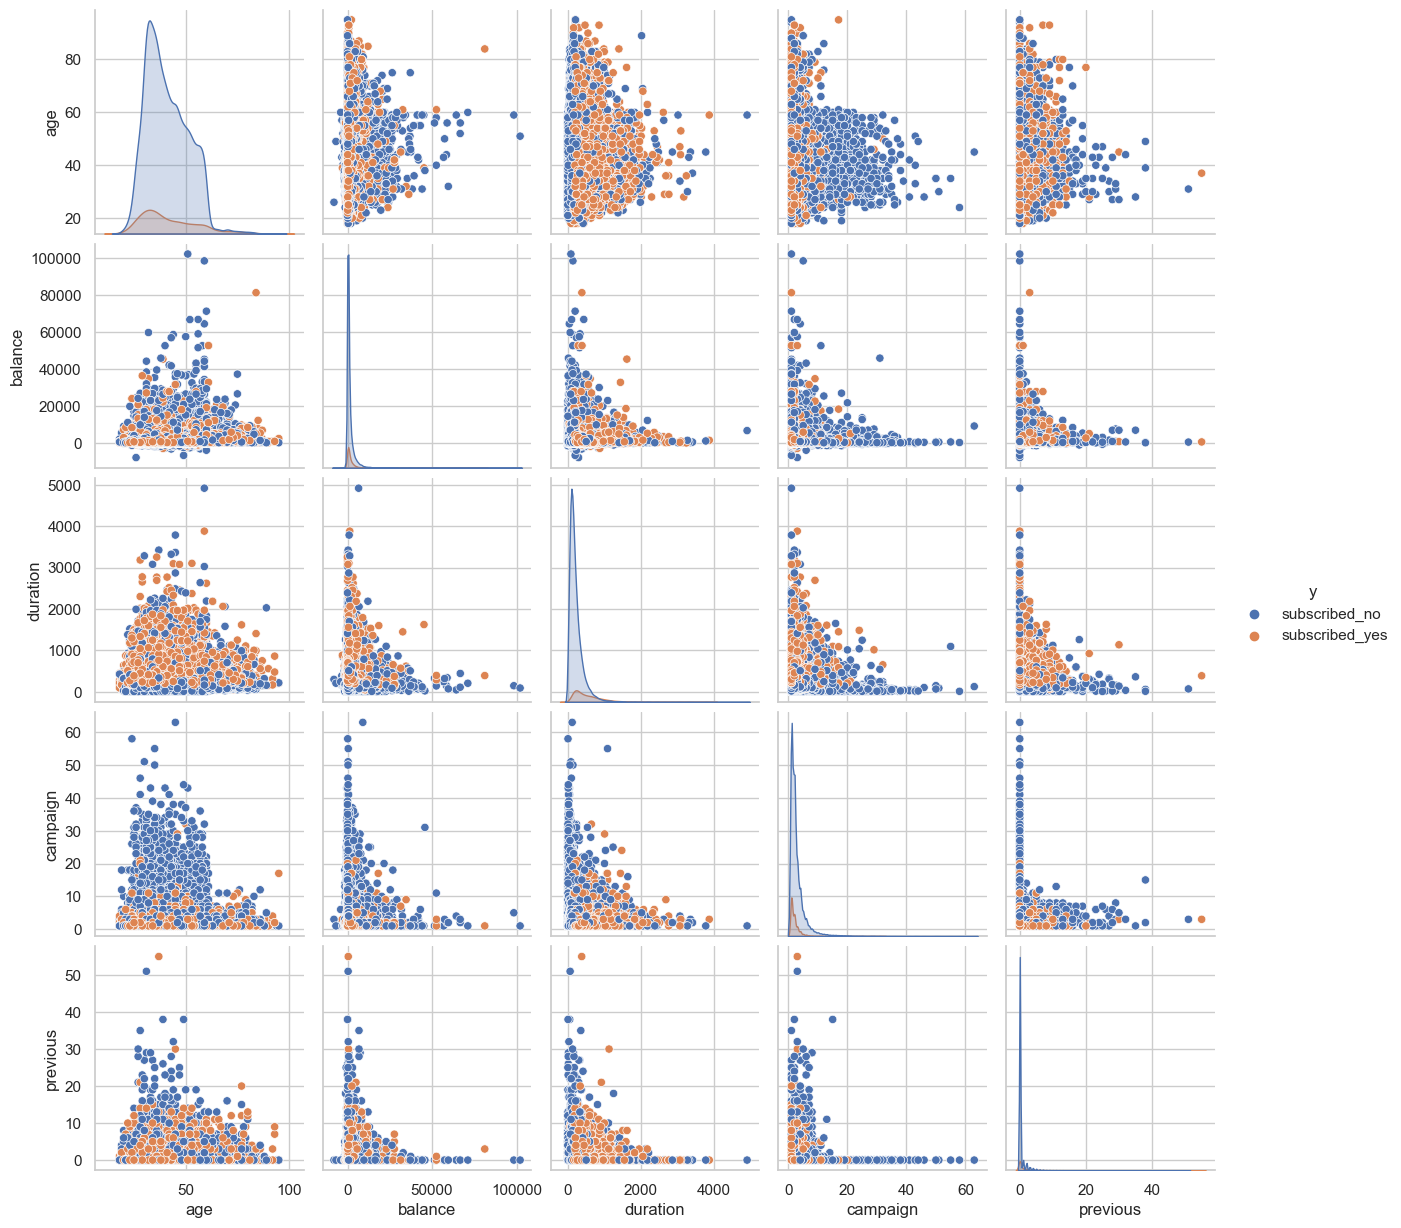

In [42]:
continuous_columns_plus_y = ['age','balance','duration','campaign','previous','y']
continuous_df = bank_df[continuous_columns_plus_y]
sns.pairplot(continuous_df, hue='y')
plt.show()

age vs campaign:
- Since there are many campaigns under the 60's age, banks should consider knowing which age group to pursuit for campaign. It was done using antoehr graph below.age vs campaign:
- Since there are many campaigns under the 60's age, banks should consider knowing which age group to pursuit for campaign. It was done using antoehr graph below.    

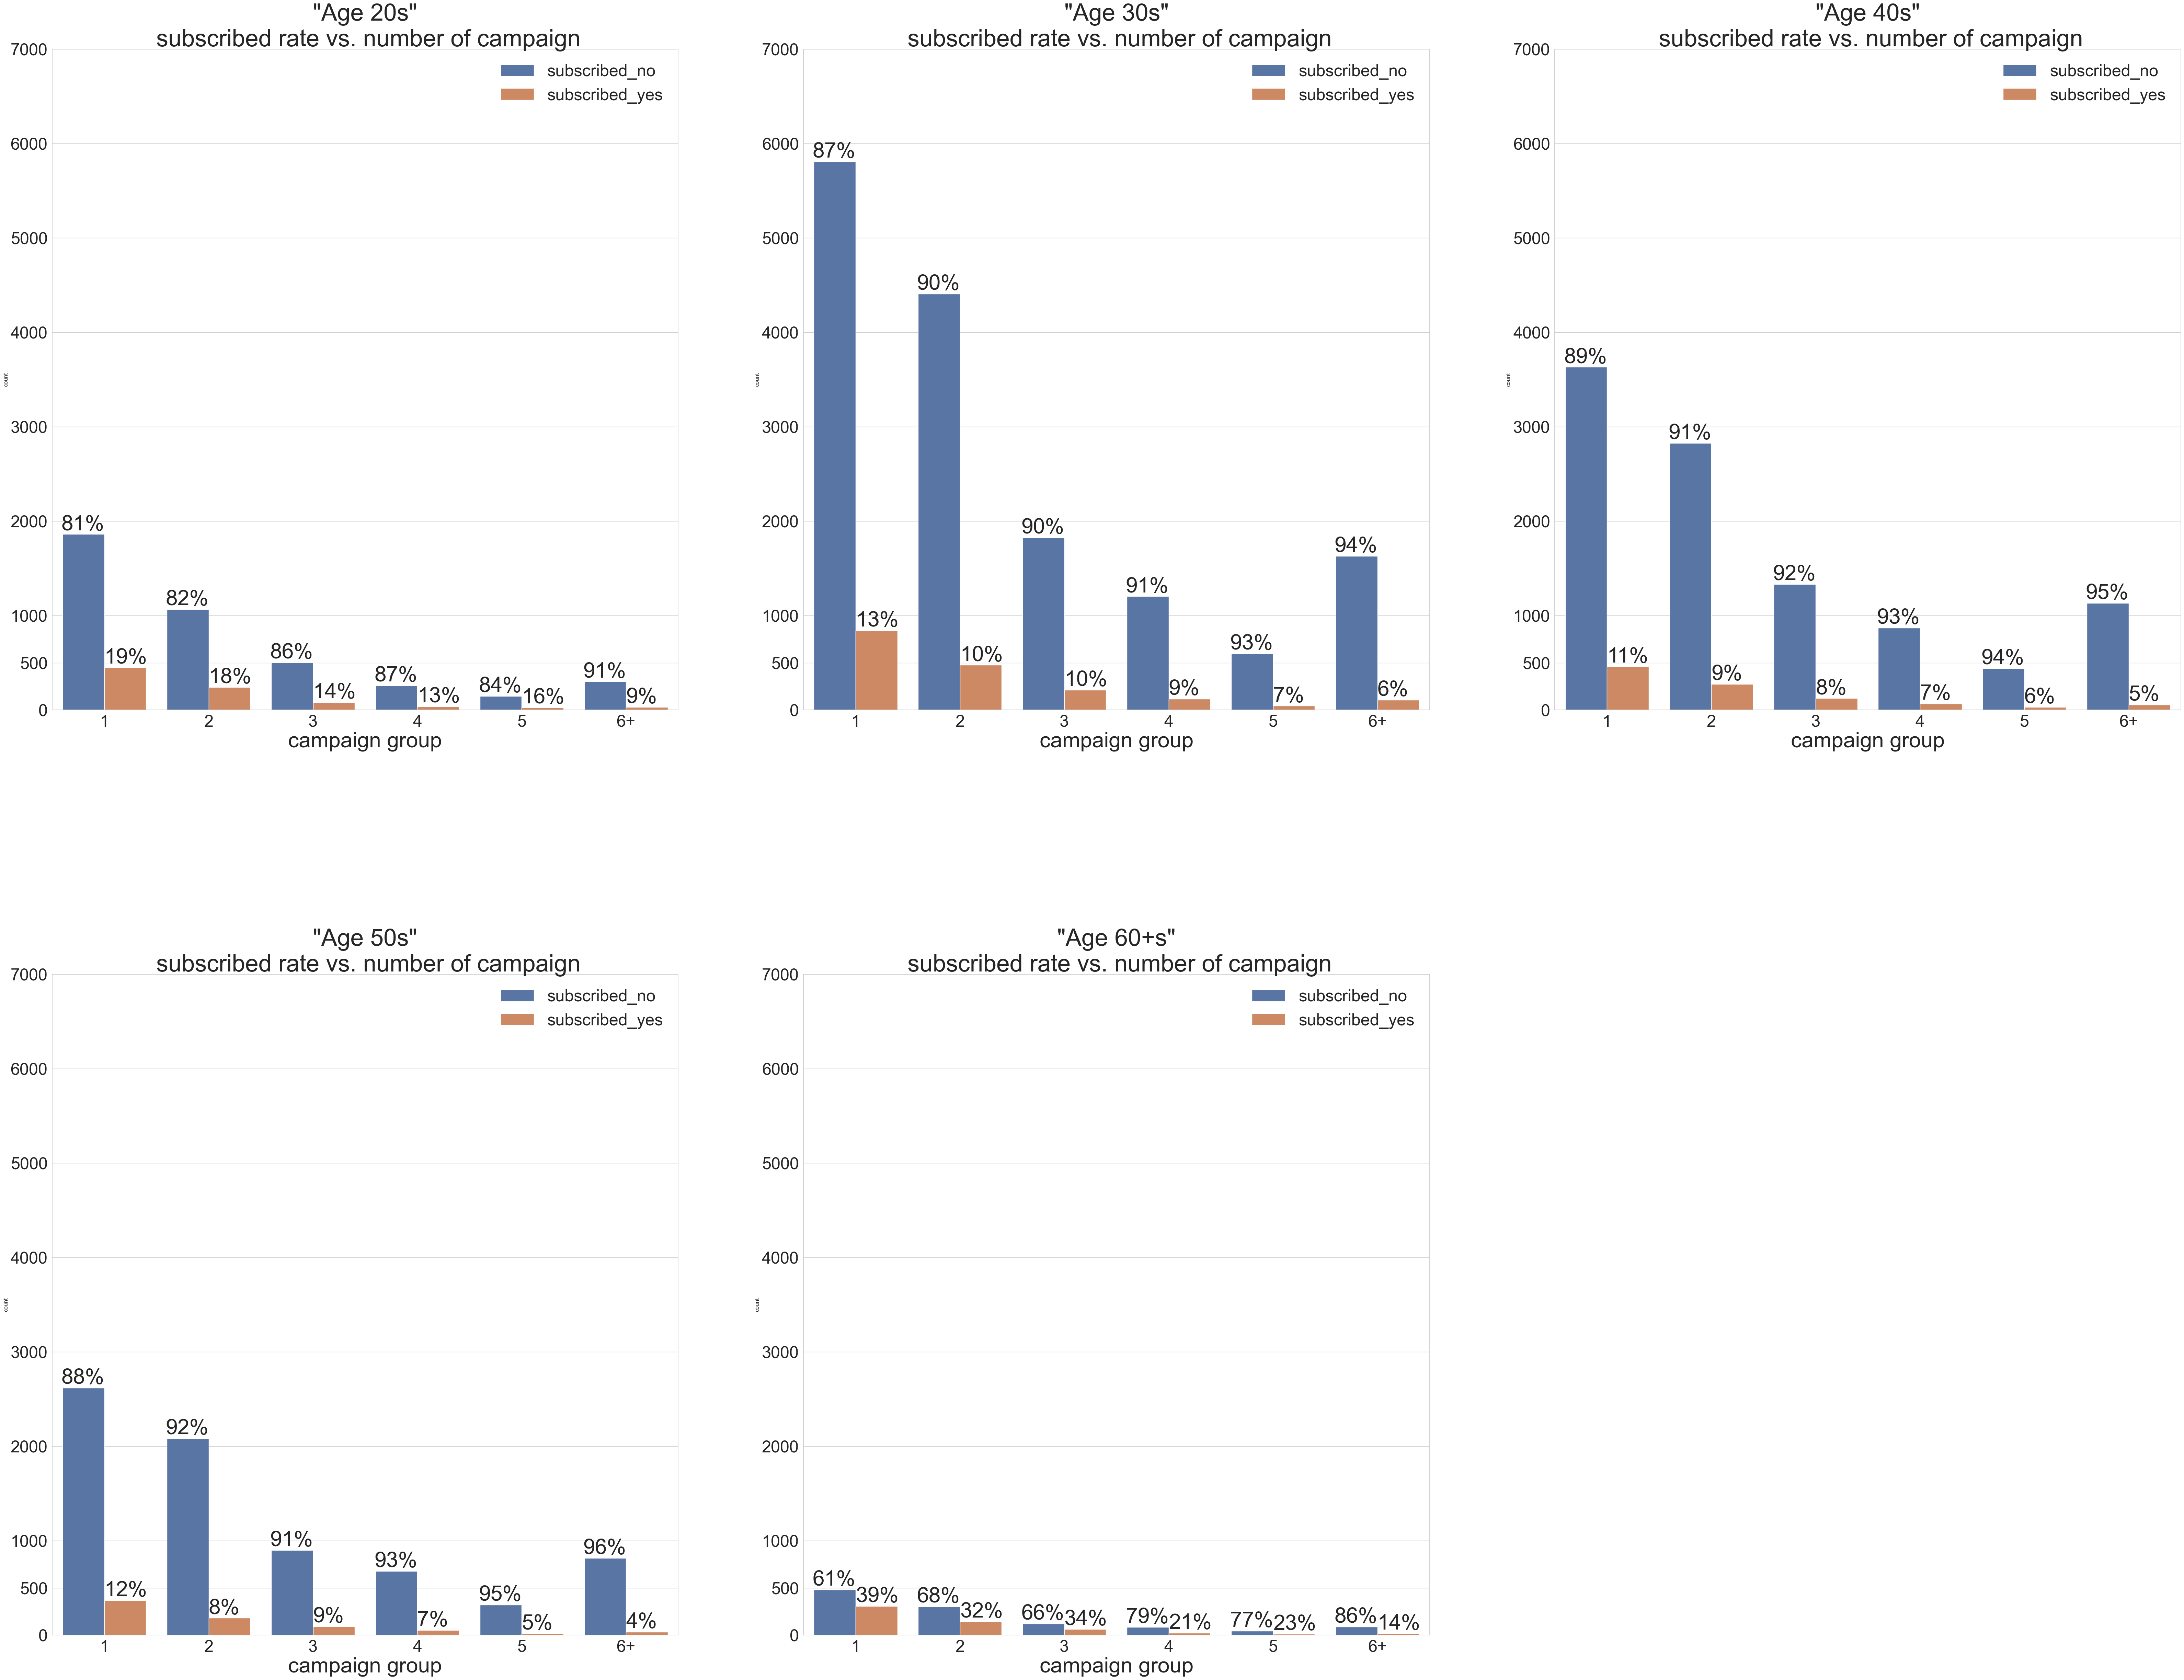

In [44]:
lst_4 = [bank_df]
for column in lst_4:
    column.loc[column["campaign"] == 1, 'campaign_group'] = '1'
    column.loc[column["campaign"] == 2, 'campaign_group'] = '2'
    column.loc[column["campaign"] == 3, 'campaign_group'] = '3'
    column.loc[column["campaign"] == 4, 'campaign_group'] = '4'
    column.loc[column["campaign"] == 5, 'campaign_group'] = '5'
    column.loc[column["campaign"] > 5, 'campaign_group'] = '6+'
fig = plt.figure(figsize=(80,60))
age_list = ['20','30','40','50','60+']
campaign_list = ['1','2','3','4','5','6+']

for i,age in enumerate(age_list):
    bank_age_group = bank_df[bank_df['age_group'] == age]

    campaign_group_y_pct = pd.crosstab(bank_age_group['y'],bank_age_group['campaign_group']).apply(lambda x: x/x.sum() * 100)
    campaign_group_y_pct = campaign_group_y_pct.transpose() 

    campaign_group_num_or_sum_df = pd.DataFrame()
    campaign_group_num_or_sum_df = pd.crosstab(bank_age_group['campaign_group'], bank_age_group['y']).reindex(index=campaign_list)

    ax = fig.add_subplot(2,3, i + 1)

    age_group_df = bank_df[bank_df['age_group'] == age]
    sns.countplot(x="campaign_group", hue="y", data=age_group_df, order=campaign_list, ax=ax)

    ax.set_xlabel('campaign group',fontsize=45, y=0.5)
    ax.tick_params(axis='x', labelsize=35)
    ax.tick_params(axis='y', labelsize=35)
    ax.set_title('"Age {}s"\n subscribed rate vs. number of campaign'.format(age),fontsize =50)
    ax.set_yticks([0,500,1000,2000,3000,4000,5000,6000,7000])
    ax.legend(fontsize=35)
    
    for i,campaign_group in enumerate(campaign_group_num_or_sum_df.index):
        plt.text(i, campaign_group_num_or_sum_df.loc[campaign_group, 'subscribed_yes'], "{}%".format(round(campaign_group_y_pct.loc[campaign_group, 'subscribed_yes'])),  ha='left', va='bottom', size=45)
        plt.text(i, campaign_group_num_or_sum_df.loc[campaign_group, 'subscribed_no'], "{}%".format(round(campaign_group_y_pct.loc[campaign_group, 'subscribed_no'])),  ha='right', va='bottom', size=45)
plt.subplots_adjust(hspace=0.4)
plt.show()

"Age 60+s" subscribed rate vs. number of campaign:
- The age group of above 60's has a high subscription rate compared to other groups. By comparing campaign groups, most of the 60's age group have campaign 1 or 2 times. You can also see that those banks do campaigns more than 2 times.

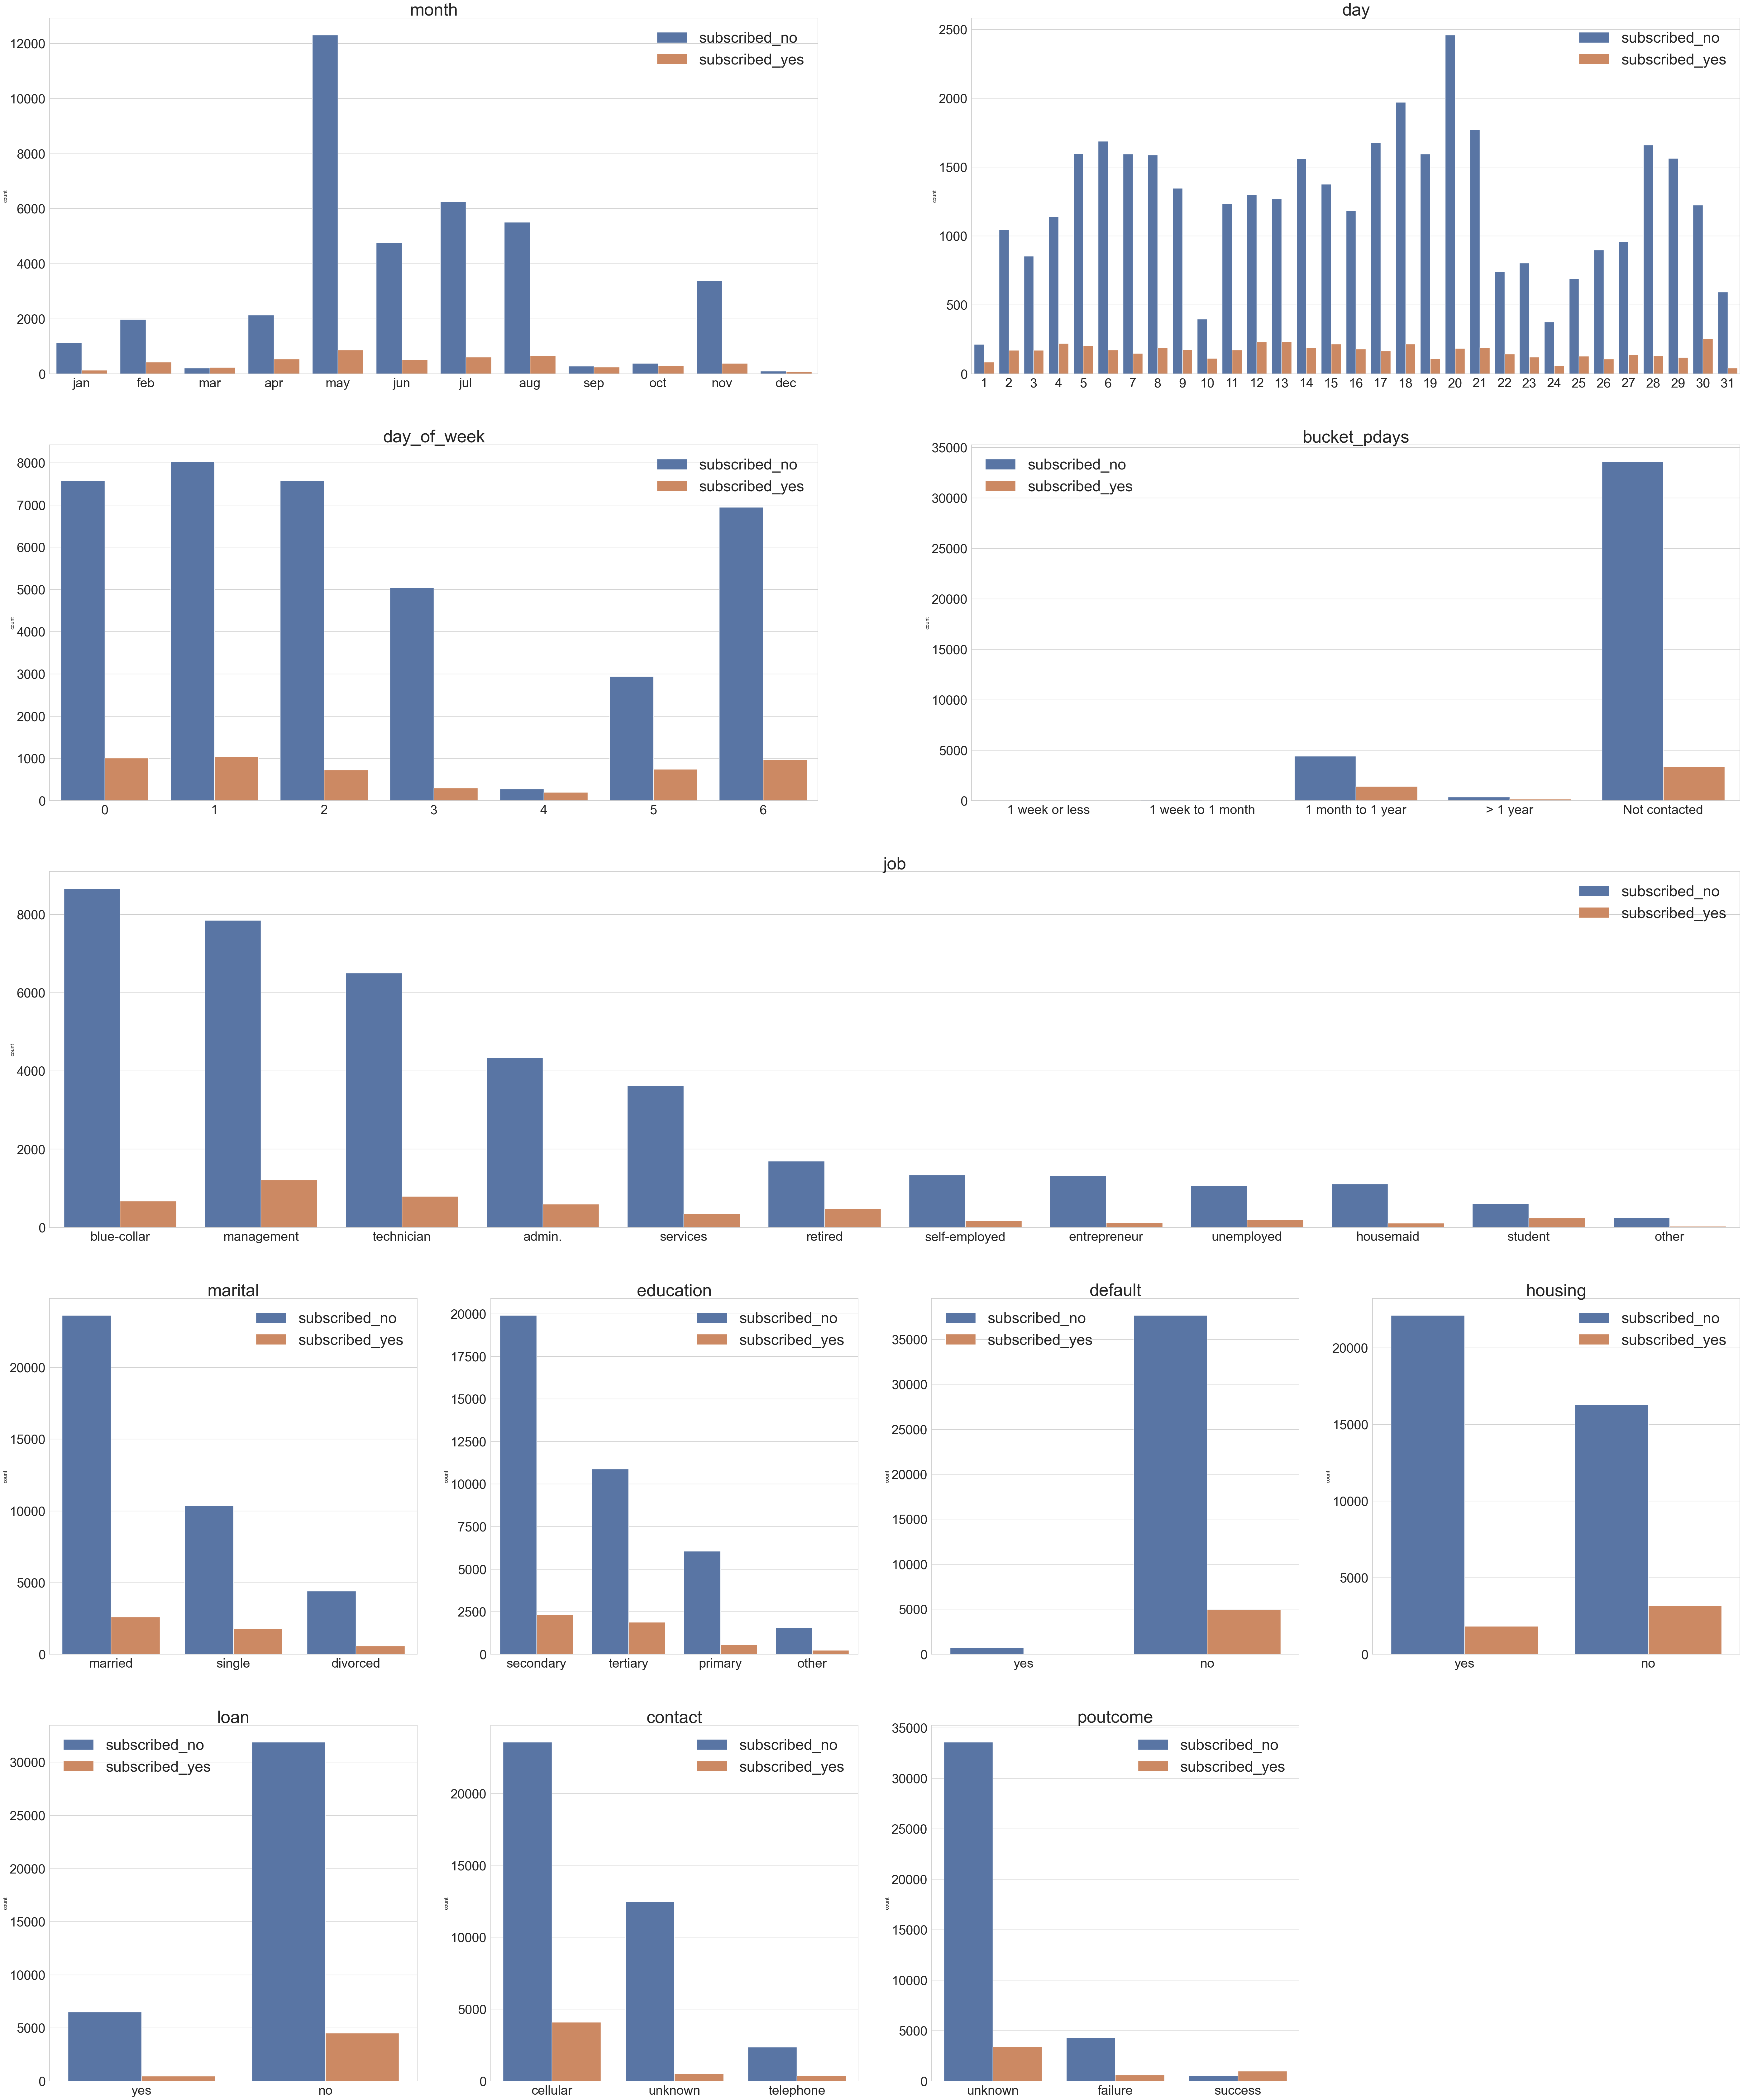

In [45]:
order_day = range(1,32)
order_day_of_week = range(0,7)
order_month = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
order_columns = ['month','day','day_of_week','bucket_pdays']
order_bucket_pdays = ['1 week or less','1 week to 1 month','1 month to 1 year','> 1 year','Not contacted']
categorical_columns = ['month','day','day_of_week','bucket_pdays','job','marital','education','default','housing','loan','contact','poutcome']
yes_no_columns = ['default','housing','loan']
fig = plt.figure(figsize=(70,86))
for i,column in enumerate(categorical_columns):
    if column in order_columns:
        if column == 'month':
           order = order_month
        elif column == 'day':
           order = order_day
        elif column == 'day_of_week':
           order = order_day_of_week
        else:
           order = order_bucket_pdays
        ax = fig.add_subplot(5,2, i + 1)
    elif column == 'job':
        ax = fig.add_subplot(5, 1, 3)
        order = bank_df['job'].value_counts().index.tolist()
    else:
        if column in yes_no_columns:
            order = ['yes', 'no']
        else:
            order = bank_df[column].value_counts().index.tolist()
        ax = fig.add_subplot(5, 4, i + 8)
    sns.countplot(x=column, hue="y", data=bank_df, ax=ax, order=order)
    ax.set_title(column,fontsize =40)
    ax.tick_params(axis='x', labelsize=30)
    ax.tick_params(axis='y', labelsize=30)
    ax.set_xlabel('')
    ax.legend(fontsize=35)
plt.show()

housing and loan:
- Both the housing and load graphs have majority “subscribed no” results
There is more “subscribed no” than “subscribed yes” on both the “housing” and “loan” graphs. 
- Because both the housing and load graphs have majority “subscribed no” results, you may want to know the “subscribed yes” rate for clients that don’t have any loan (loan = no, housing = no).

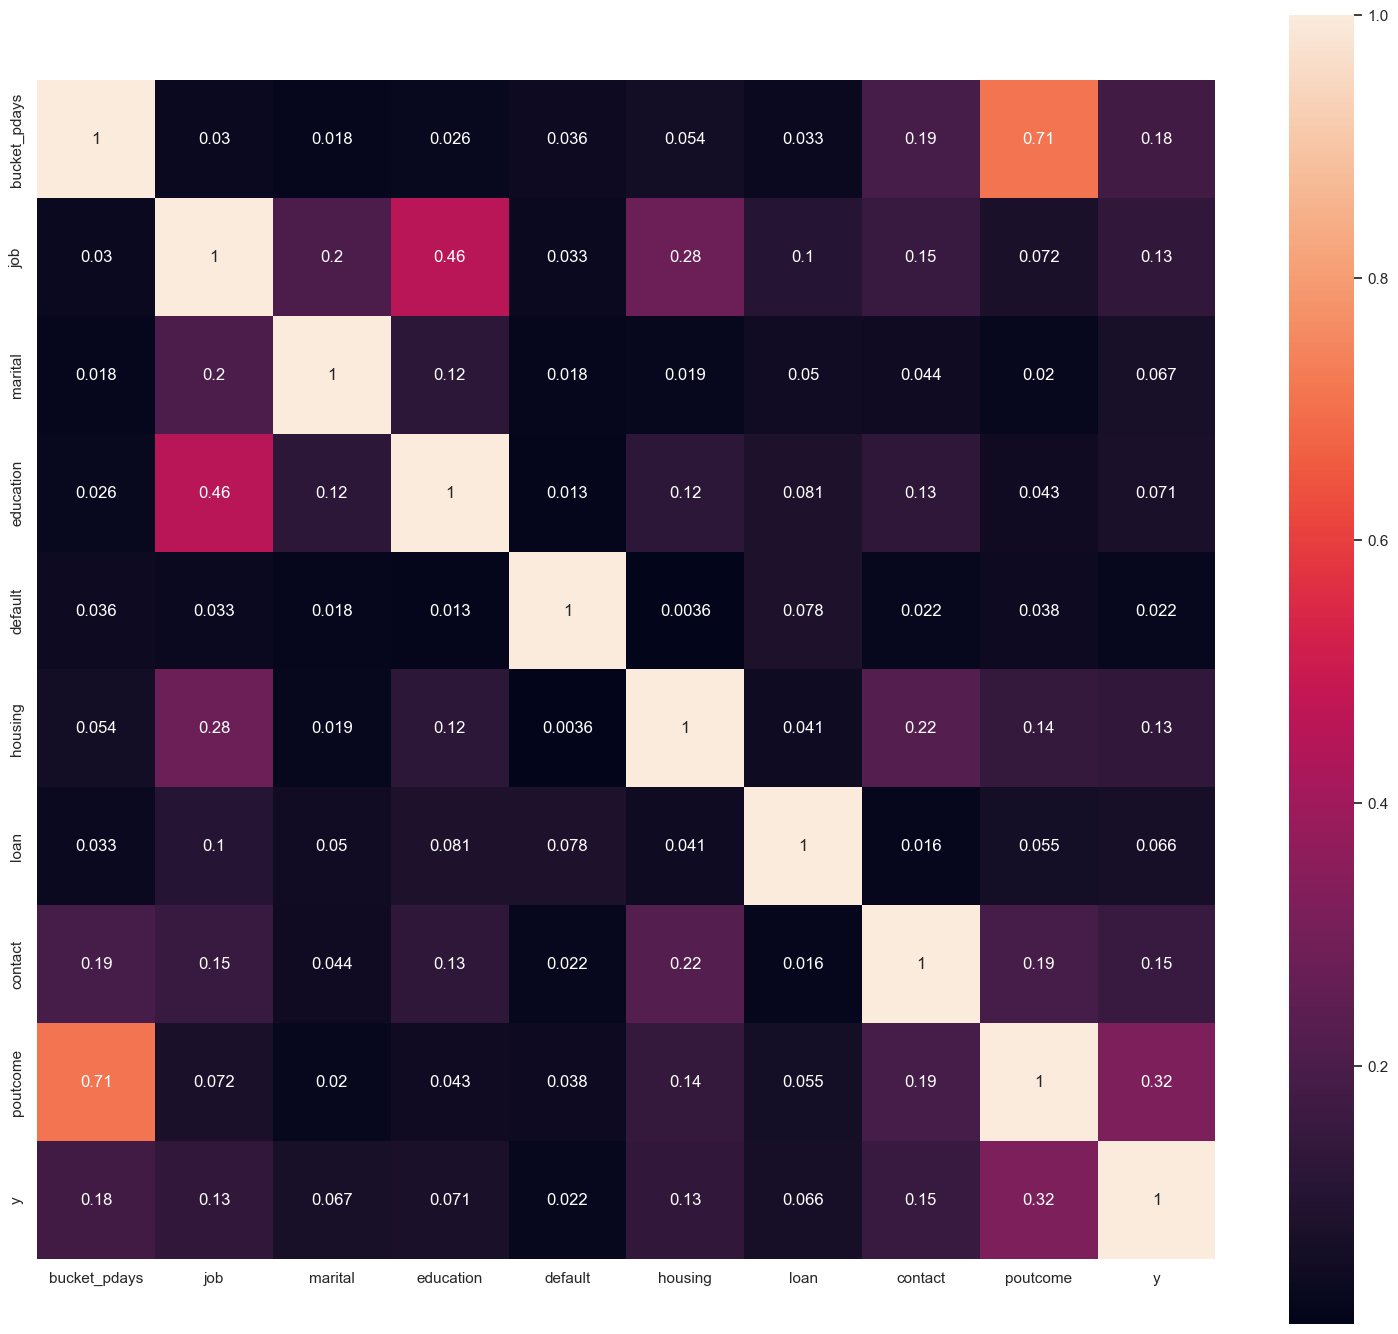

In [46]:
bank_categorical = bank_df[['bucket_pdays','job','marital','education','default','housing','loan','contact','poutcome','y']]

def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

values_list = []

for columns_1 in bank_categorical.columns:
    values_list_each_row = []
    for columns_2 in bank_categorical.columns:
        confusion_matrix = pd.crosstab(bank_df[columns_1], bank_df[columns_2])
        corr_value = cramers_v(confusion_matrix.values)
        values_list_each_row.append(corr_value)
    values_list.append(values_list_each_row)
values_list

index1 = bank_categorical.columns
columns1 = bank_categorical.columns
corr_df = pd.DataFrame(data=values_list, index=index1, columns=columns1)

sns.set(rc = {'figure.figsize':(19,17)})
sns.heatmap(corr_df,
            square=True,
            annot=True,
            xticklabels=corr_df.columns.values,
            yticklabels=corr_df.columns.values)
plt.show()

- the correlation matrix shows the highest correlation between these pairs of variables. There are some that show higher correlation, like above 0.3, and some with weak corraltion, like below 0.1.
- the poutcome and poutcome were the most correlated with the target y

#### 4. Feature Selection

In [47]:
bank_df_future_engineering = bank_df.copy()

In [48]:
def y_num(y):
    if y == 'subscribed_yes':
        return 1
    else:
        return 0
bank_df_future_engineering['y'] = bank_df_future_engineering['y'].apply(y_num)

In [49]:
def month_to_num(month):
    if month == 'jan':
       return 1
    elif month == 'feb':
       return 2
    elif month == 'mar':
       return 3
    elif month == 'apr':
       return 4
    elif month == 'may':
       return 5
    elif month == 'jun':
       return 6
    elif month == 'jul':
       return 7
    elif month == 'aug':
       return 8
    elif month == 'sep':
       return 9
    elif month == 'oct':
       return 10
    elif month == 'nov':
       return 11
    else:
       return 12

bank_df_future_engineering['month'] = bank_df_future_engineering['month'].apply(month_to_num)

In [50]:
bank_df_future_engineering = pd.get_dummies(bank_df_future_engineering)

#### 5.  ML Models

In [54]:
#Train/ test split
from sklearn.model_selection import train_test_split
X, y = bank_df_future_engineering.drop('y',axis=1), bank_df_future_engineering['y']
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=0)

In [55]:
# Correcting class imbalanced data
y_train.value_counts()

y
0    21596
1     2800
Name: count, dtype: int64

In [56]:
from imblearn.over_sampling import SMOTE
 
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [57]:
y_train_sm.value_counts()

y
0    21596
1    21596
Name: count, dtype: int64

In [58]:
#Drop outliers in the column  'balance','duration','campaign' and 'previous'

X_train_sm[['balance','duration','campaign','previous']].describe()

balance      duration      campaign      previous
count  43192.000000  43192.000000  43192.000000  43192.000000
mean    1511.991133    379.530955      2.364859      0.577653
std     2935.730611    342.637874      2.639216      1.670570
min    -3313.000000      0.000000      1.000000      0.000000
25%      119.000000    145.000000      1.000000      0.000000
50%      536.000000    263.000000      2.000000      0.000000
75%     1730.000000    510.250000      3.000000      0.000000
max    98417.000000   3422.000000     63.000000     55.000000

In [59]:
q_balance = X_train_sm.balance.quantile(0.95)
q_balance_low = X_train_sm.balance.quantile(0.05)
q_duration = X_train_sm.duration.quantile(0.95)
q_campaign = X_train_sm.campaign.quantile(0.95)
q_previous = X_train_sm.previous.quantile(0.95)

X_train_sm['y'] =  y_train_sm

X_train_sm_outlier_removed = X_train_sm[(X_train_sm['balance']<q_balance)&(X_train_sm['balance']>q_balance_low)&(X_train_sm['duration']<q_duration)&\
                                                   (X_train_sm['campaign']<q_campaign)&(X_train_sm['previous']<q_previous)]

In [60]:
X_train, y_train = X_train_sm_outlier_removed.drop('y', axis=1), X_train_sm_outlier_removed['y']

In [61]:
import sklearn.metrics as me
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.utils.class_weight import compute_sample_weight

In [62]:
def plot_confusion_matrix(data, labels):
    sns.set(color_codes=True)
    plt.figure(1, figsize=(12, 8))
 
    plt.title("Confusion Matrix",  fontsize=18)
 
    sns.set(font_scale=1.4)
    ax = sns.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'}, fmt="d")
 
    ax.set_xticklabels(labels, fontsize=18)
    ax.set_yticklabels(labels, fontsize=18)
 
    ax.set_xlabel("Predicted Label",fontsize=18)
    ax.set_ylabel("True Label",fontsize=18)

def sbscribed_yes_no(y):
    if y == 1:
        return 'subscribed_yes'
    else:
        return 'subscribed_no'

labels = ['subscribed no','subscribed yes']

### 5.1 Random Forest Classifier

In [ ]:
params = {
    'criterion'   : ['gini', 'entropy'],
    'n_estimators': [10, 100, 300, 500, 1000],
    'max_depth'   : [3, 5, 7, 9, 11, 15, 20]
}

rf = RandomForestClassifier(class_weight = {0:1, 1:20})
grid_search = GridSearchCV(rf, param_grid=params, cv=5, n_jobs = -1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_


In [ ]:
rf_pred = best_rf.predict(X_test)
rf_confusion = me.confusion_matrix(y_test, rf_pred)
plot_confusion_matrix(rf_confusion, labels)

In [ ]:
y_test_str = y_test.apply(sbscribed_yes_no)
rf_pred_str = pd.Series(rf_pred).apply(sbscribed_yes_no)
print(classification_report(y_test_str, rf_pred_str))

fpr_all, tpr_all, th_all  = me.roc_curve(y_test, best_rf.predict_proba(X_test)[:, 1], pos_label=1)

plt.figure(figsize=(8,6))
plt.plot(fpr_all, tpr_all, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()

rf_2_original_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])
print('AUC : {}'.format(rf_2_original_auc))

### 5.2 XGBoost Classifier

In [ ]:
best_score = 0

for max_depth in range (2, 10, 1):
   for n_estimators in range(60, 220, 40):
      for learning_rate in [0.1, 0.01, 0.05]:
         xgb = XGBClassifier(
           max_depth=max_depth,
           n_estimators=n_estimators,
           learning_rate=learning_rate,
           class_weight='balanced',
           objective= 'binary:logistic',
           nthread=4,
           seed=42,
           verbosity = 0,
           silent=True,
           n_jobs=-1)
       
         xgb.fit(X_train, y_train, sample_weight=compute_sample_weight("balanced", y_train))
       
         scores = cross_val_score(xgb, X_val, y_val, cv=3, scoring='roc_auc')
         score = np.mean(scores)
         if score > best_score:
           best_xgb = xgb

In [ ]:
xgb_pred = best_xgb.predict(X_test)
xgb_confusion = me.confusion_matrix(y_test, xgb_pred)
plot_confusion_matrix(xgb_confusion, labels)

In [ ]:
y_test_str = y_test.apply(sbscribed_yes_no)
xgb_pred_str = pd.Series(xgb_pred).apply(sbscribed_yes_no)
print(classification_report(y_test_str, xgb_pred_str))

fpr_all, tpr_all, th_all  = me.roc_curve(y_test, best_xgb.predict_proba(X_test)[:, 1], pos_label=1)

plt.figure(figsize=(8,6))
plt.plot(fpr_all, tpr_all, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()

xgb_auc = roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1])
print('AUC : {}'.format(xgb_auc))

- To predict the target variable of subscribed, the AUC score measured the probability of the classifier ranking between yes and no.
- The best model is xgboost with the AUC score of 0.90, which means that there is 90% chance it will distinguish yes and no.

####  6. Conclusion 

- **Summmery**:
- The EDA of the dataset shows that clients of ages above 60 years and under 30 years have a higher probability of subscribed yes. The housing/loan subscribed rate shows a higher probability when loan is no. The subscribed clients also have higher probability of having the duration over 300.
- The best machine learning model was xgboost, which resulted in a 0.904 AUC score.

- **Conclusion**:

According to previous analysis, a target customer profile can be established. The most responsive customers possess these features:
- Feature 1: age < 30 or age > 60
- Feature 2: students or retired people
- Feature 3: a balance of more than 5000 

By applying random forest classifer and XGboost classifer algorithms, classification and estimation model were successfully built. With these two models, the bank will be able to predict a customer's response to its telemarketing campaign before calling this customer. In this way, the bank can allocate more marketing efforts to the clients who are classified as highly likely to accept term deposits, and call less to those who are unlikely to make term deposits.

In addition, predicting duration before calling and adjusting marketing plan benefit both the bank and its clients. On the one hand, it will increase the efficiency of the bank’s telemarketing campaign, saving time and efforts. On the other hand, it prevents some clients from receiving undesirable advertisements, raising customer satisfaction. With the aid of logistic and ridge regression models, the bank can enter a virtuous cycle of effective marketing, more investments and happier customers.